Import Keras

In [262]:
#import keras
import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Print the keras version number

In [263]:
#keras version
keras.__version__

'2.2.4'

Import fashion mnist dataset from keras

In [264]:
#import fashion_mnist
from keras.datasets import fashion_mnist

fashion_mnist = keras.datasets.fashion_mnist

Load the dataset

In [265]:
#fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(fashion_mnist)

<module 'keras.datasets.fashion_mnist' from '/Users/owner/opt/anaconda3/lib/python3.7/site-packages/keras/datasets/fashion_mnist.py'>


In [266]:
print('train: X=%s, y=%s' %(train_images.shape, train_labels.shape))

train: X=(60000, 28, 28), y=(60000,)


you can read more about fashion mnist dataset here 
https://github.com/zalandoresearch/fashion-mnist

Understand the dataset and answer the following 


*   Dimentions of the images in the dataset?
*   How many entries dose this dataset contains?
*   How the images are labled?
*   What is the range of the pixel values in train_images?
*   Plot the first image in the  "train_images" using matplotlib.pyplot








In [267]:
#dimentions of the images in the dataset?
# 60.000 images in the dataset, with each represented as 28x28 pixels
train_images.shape


(60000, 28, 28)

In [268]:
test_images.shape

(10000, 28, 28)

In [269]:
# how many entries dose this dataset contains?
# = 60,000 labels in the dataset
len(train_labels)

60000

In [270]:
len(test_labels)

10000

In [271]:
#how the images are labled? 
# = each label is between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [272]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [273]:
#what is the range of the pixel values in train_images? 
#= see that pixels values fall in range of 0 to 255 / 28x28
print (train_images.size)
print(train_images.shape)

47040000
(60000, 28, 28)


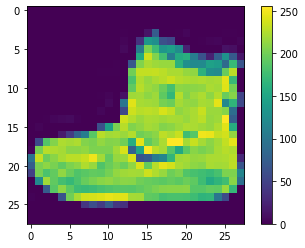

In [274]:
#plot the first image in the  "train_images" using matplotlib.pyplot
#= see that pixels values fall in range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()   #to show lateral bar
plt.grid(False)  #to dont show name on top
plt.show()  #dont really need

In [275]:
#why should we normalize the dataset?
#= we need to scale theses values to a range of 0 to 1 before feeding them to the neural network model.
#The goal of normalization is to change the values of numeric columns in the dataset to a common scale, 
#without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. 
#It is required only when features have different ranges.


You can read more about why we normalize the dataset here
https://www.jeremyjordan.me/batch-normalization/



```
import numpy as np
#To get the values between 0 to 1 instead of 0 to 255
train_images = np.expand_dims(train_images, axis=-1)  # (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1) # (10000, 28, 28, 1)
#Please Normalize the train_images
train_images = ?
test_images = ?
#print(train_images[0])
plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
```



In [276]:
#normalizing Train Images

# convert int to float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#normalize to range 0-1, by dividing by 255(max value), both need to be processed in the same way
train_images = train_images/255.0
test_images = test_images/255.0

# or:
#train_images = train_images.reshape((60000, 28 * 28))
#train_images = train_images.astype('float32')/255

#test_images = test_images.reshape((10000, 28 * 28))
#test_images = test_images.astype('float32')/255

#print(train_images[0])
#plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
#plt.show()

#label description
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

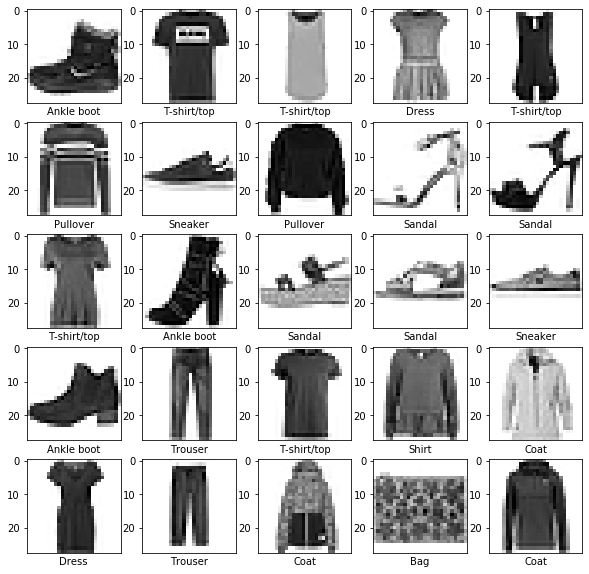

In [277]:
# verify if data is correct format, lets display the 25 first images below from training and display the class name below image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.xticks([])  
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [278]:
#To get the values between 0 to 1 instead of 0 to 255
train_images = np.expand_dims(train_images, axis=-1)  # (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1) # (10000, 28, 28, 1)



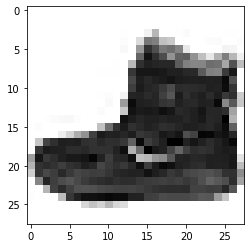

In [279]:
#print(train_images[0])
plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [280]:
#label description
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [281]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [282]:
train_labels = to_categorical(train_labels)
print(train_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [283]:
print(train_labels.shape)
#10 labels as 'one hot'

(60000, 10)


In [284]:
#### or acc doesnt work
test_labels = to_categorical(test_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]




```
#Create a model that uses relu activation function for all layers except the last layer.
#Please enter appropriate numbers/words instead of the '?'
model = keras.Sequential([
   keras.layers.Conv2D(32, (3,3), padding='same', activation='?',
                           input_shape=(?, ?, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='?', activation='?'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='?'),
    keras.layers.Dense(10,  activation='softmax')
])
```



In [285]:
#building the neural network
model = keras.Sequential([
   keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,  activation='softmax')
])


To make our network ready for training, we need to pick three more things, as part of "compilation" step:
*    **A loss function:** the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
*    **An optimizer:** this is the mechanism through which the network will update itself based on the data it sees and its loss function.
*    **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).



```
# choose appropriate values for the following fields
model.compile(optimizer="?",
              loss="?",
              metrics=["?"])
```








In [286]:
#model compilation
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


we are now ready to train our network
pick appropriate values for **epochs** and **batch_size**


```
model.fit(images, labels, epochs=? , batch_size=? )
```




In [ ]:
#train the Network with train_images and train_labels
# 0.9601 = we have 96% accuracy on training data.
history = model.fit(train_images, train_labels, epochs=2 , batch_size=128, validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 60s 1ms/step - loss: 0.0349 - acc: 0.9872 - val_loss: 0.3533 - val_acc: 0.9227
Epoch 2/2
 9728/60000 [===>..........................] - ETA: 44s - loss: 0.0277 - acc: 0.9900

Check how the model performs on the test set using **evaluate** and print the **test accuracy**

In [385]:
#evaluate the test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 5s 492us/step


In [386]:
print('test acc:', test_acc)
# 96,2% accuracy on test, a bit lower than training. models tend to perform worse on new data than on training.(overfitting)

test acc: 0.9289


In [387]:
print('test loss:', test_loss)

test loss: 0.35710216657966376


In [388]:
#get the Prediction data for all the images
prediction = model.predict(test_images)
print(prediction)

[[4.1064550e-14 1.1011555e-21 3.4813874e-11 ... 2.0049582e-08
  3.3354657e-16 1.0000000e+00]
 [1.0775150e-15 9.8828420e-34 1.0000000e+00 ... 7.2587696e-26
  3.2703862e-26 7.9106417e-26]
 [1.4019925e-15 1.0000000e+00 7.3522683e-18 ... 8.1457608e-27
  2.8702166e-20 1.4630208e-25]
 ...
 [1.4263486e-15 4.0386477e-27 3.0549173e-15 ... 2.5132359e-20
  1.0000000e+00 2.5511813e-25]
 [1.4187325e-19 1.0000000e+00 3.0886248e-18 ... 1.5681620e-25
  4.5618949e-23 1.0509589e-20]
 [1.1703885e-05 5.0147790e-12 9.5902366e-04 ... 9.6513648e-03
  4.7223161e-06 5.0546194e-05]]


Remenber the model will give you the probability of the image for each label

In [389]:
#takes the highest value from the prediction
#array of 10 numbers, represent the model that image corresponds to each of the 10 dif articles of clothing
print((prediction[0]))

[4.1064550e-14 1.1011555e-21 3.4813874e-11 6.0439447e-15 3.0945234e-17
 1.3972815e-10 6.6379579e-13 2.0049582e-08 3.3354657e-16 1.0000000e+00]


So you have to pick the highest probability from it to get the actual prediction

In [390]:
print(np.argmax(prediction[0]))
#show which label has the highest confidence value

9


To print the corresponding label use **class_names**  

In [391]:
print(class_names[np.argmax(prediction[0])])

Ankle boot


**Bonus**:

  Show some of the test images along with Predicted and actual value

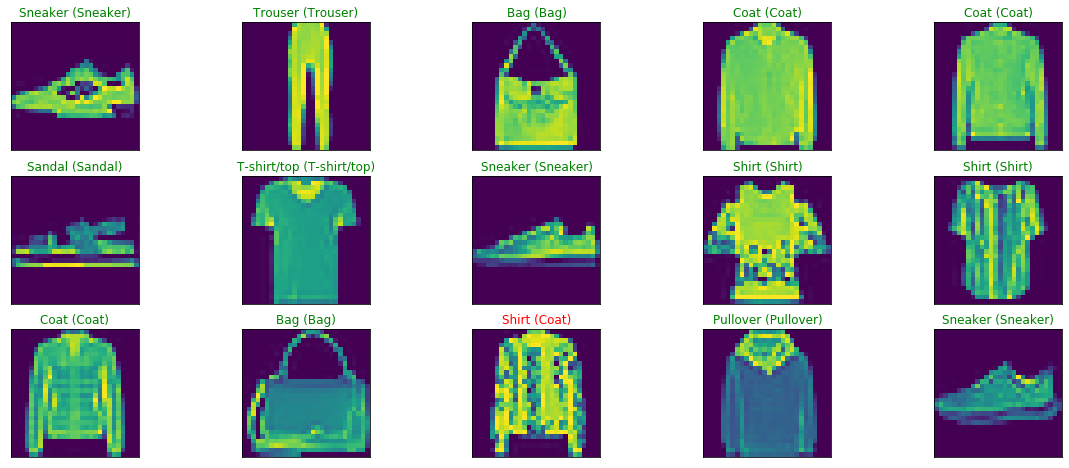

In [401]:
## Visualize prediction
#Now let's visualize the prediction using the model you just trained. 
#First we get the predictions with the model from the test data.
#Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
#If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

y_hat = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_labels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [392]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


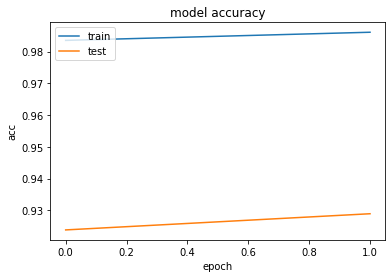

In [394]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

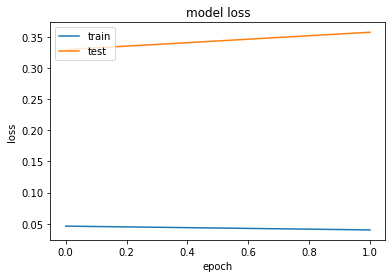

In [396]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

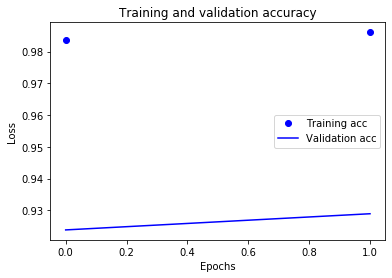

In [397]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
epochs = np.arange(len(acc_values))
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [398]:

#Bonus
#graph to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

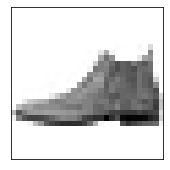

In [399]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

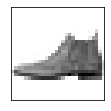

In [336]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)